In [1]:
# Load the packages and the dataset
library(ggpubr)
library(dplyr)

load("Rdata_files/histogramDF.Rdata") # as hist.df

Loading required package: ggplot2
Loading required package: magrittr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [5]:
names(hist.df)

[1] "motifname"  "Freqs.Full" "Freqs.25M"  "Freqs.10M"  "Freqs.5M"  
[6] "Freqs.1M"

In [8]:
# Try running asinh on all the values
trans.hist.df <- hist.df %>% transmute(Motif = motifname, 
                                       Freqs.Full = asinh(Freqs.Full),
                                       Freqs.25M = asinh(Freqs.25M),
                                       Freqs.10M = asinh(Freqs.10M),
                                       Freqs.5M = asinh(Freqs.5M),
                                       Freqs.1M = asinh(Freqs.1M)
                                      )

In [25]:
trans.hist.df %>% gghistogram(x = "Freqs.Full", fill = "steelblue", bins = 50) -> hist.full
trans.hist.df %>% gghistogram(x = "Freqs.25M", fill = "darkred", bins = 50) -> hist.25M
trans.hist.df %>% gghistogram(x = "Freqs.10M", fill = "darkgreen", bins = 50) -> hist.10M
trans.hist.df %>% gghistogram(x = "Freqs.5M", fill = "darkorange", bins = 50) -> hist.5M
trans.hist.df %>% gghistogram(x = "Freqs.1M", fill = "yellow2", bins = 50) -> hist.1M

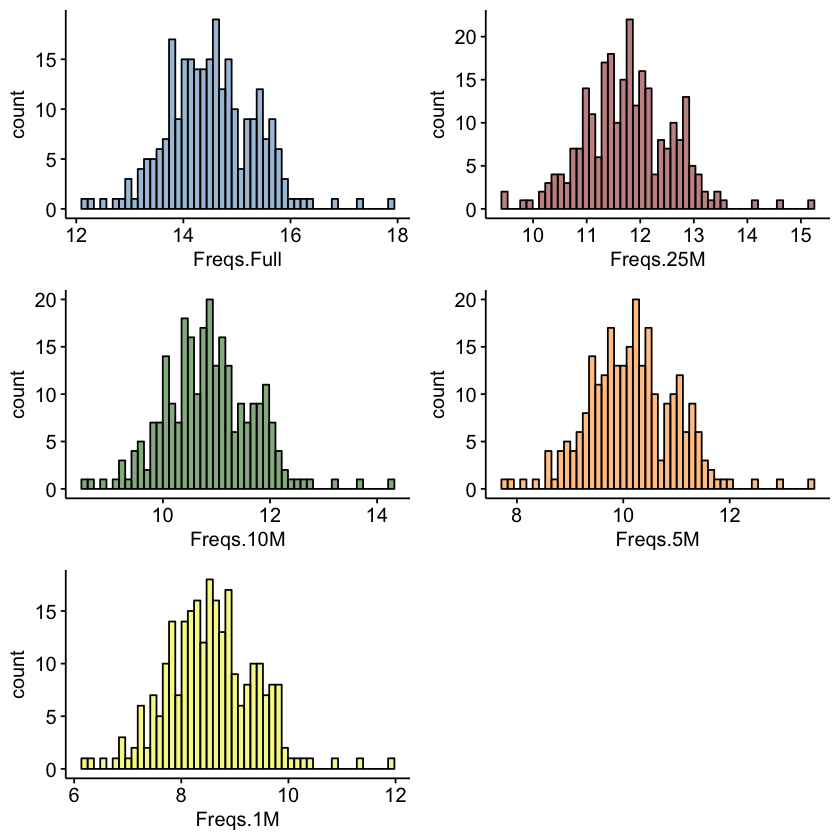

In [26]:
ggarrange(hist.full, hist.25M, hist.10M, hist.5M, hist.1M, nrow = 3, ncol = 2)

That's a look at ALL of them at once; what about looking just at the bottom 10% (bottom 26)??

In [23]:
sub.hist <- head(hist.df, 26)

sub.hist %>% gghistogram(x = "Freqs.Full", fill = "steelblue", bins = 26) -> sub.full
sub.hist %>% gghistogram(x = "Freqs.25M", fill = "darkred", bins = 26) -> sub.25M
sub.hist %>% gghistogram(x = "Freqs.10M", fill = "darkgreen", bins = 26) -> sub.10M
sub.hist %>% gghistogram(x = "Freqs.5M", fill = "darkorange", bins = 26) -> sub.5M
sub.hist %>% gghistogram(x = "Freqs.1M", fill = "yellow2", bins = 26) -> sub.1M

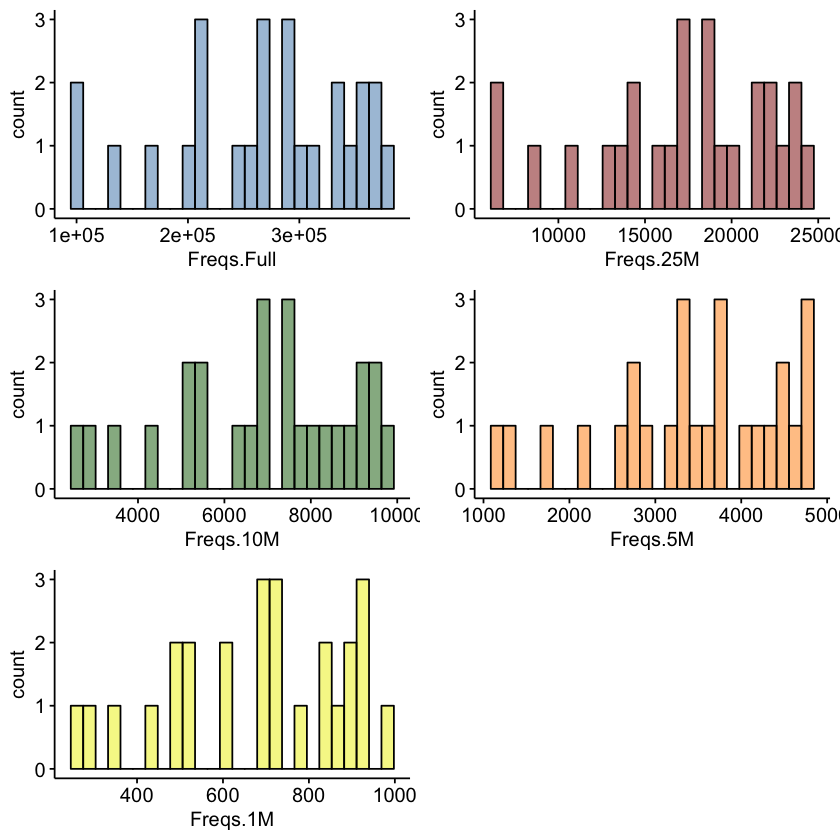

In [24]:
ggarrange(sub.full, sub.25M, sub.10M, sub.5M, sub.1M, nrow = 3, ncol = 2)

In [27]:
tail(hist.df)

motifname,Freqs.Full,Freqs.25M,Freqs.10M,Freqs.5M,Freqs.1M
Hsapiens-jaspar2016-SP1-MA0079.3,5229442,336550,134375,67219,13546
Hsapiens-jaspar2016-SP2-MA0516.1,5622802,362012,144307,72778,14378
Hsapiens-jaspar2016-FOXP1-MA0481.1,6349349,407345,163667,81370,16238
Hsapiens-jaspar2016-STAT1::STAT2-MA0517.1,10495100,675749,270483,135615,27162
Hsapiens-jaspar2016-IRF1-MA0050.2,16670349,1073517,428522,214357,42797
Hsapiens-jaspar2016-ZNF263-MA0528.1,29282877,1883787,753096,377920,75473


## Colorscheme experiments

Playing with colors on different lines to see what happens when things are different.  Use the following 3 "model names" to mimic:

* "Gradient Boosted"
* "Linear Regression"
* "Random Forest"

We'll make 3 plots, with 2 lines on each

In [29]:
toy.df <- data_frame(x = rep(1:100, 3), 
                     y = c(1:100, 2*(1:100), 1.5*(1:100)),
                     lab = c(rep("Linear Regression",100),
                             rep("Gradient Boosted", 100),
                             rep("Random Forest", 100)
                            )
                    )
str(toy.df)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	300 obs. of  3 variables:
 $ x  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ y  : num  1 2 3 4 5 6 7 8 9 10 ...
 $ lab: chr  "Linear Regression" "Linear Regression" "Linear Regression" "Linear Regression" ...


Plot 1: just do all 3 and see what happens:

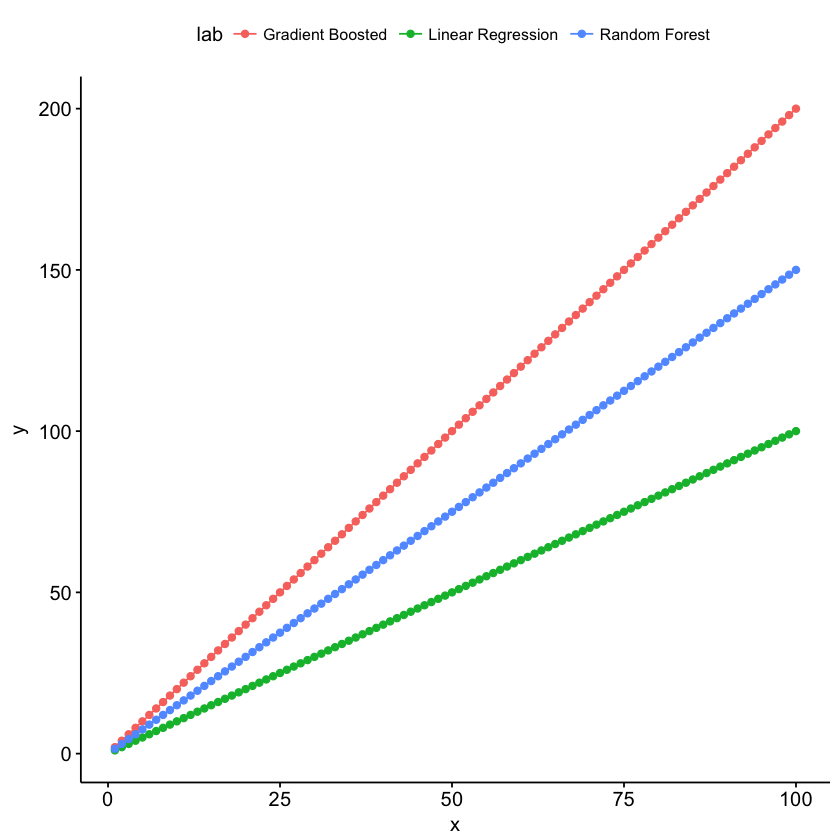

In [30]:

toy.df %>% ggline(x = "x", y = "y", color = "lab")

Plot 2, make the following changes:

* Put it Linear -> Random -> Gradient
* Force Linear = Blue, Random = Red, Gradient = Green

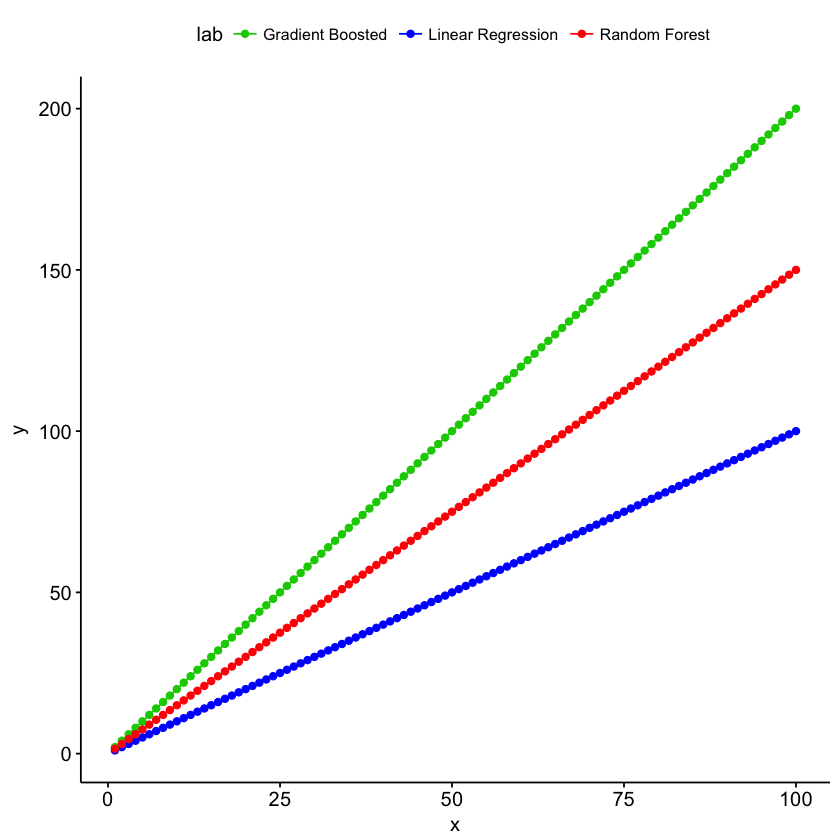

In [35]:
# Make a manual colorscheme
myColors <- c(4,2,3)
names(myColors) <- c("Linear Regression",
                     "Random Forest",
                     "Gradient Boosted"
                    )
colScale <- scale_colour_manual(name = "lab",values = myColors)


# Now plot
toy.df %>% ggline(x = "x", y = "y", color = "lab") + colScale

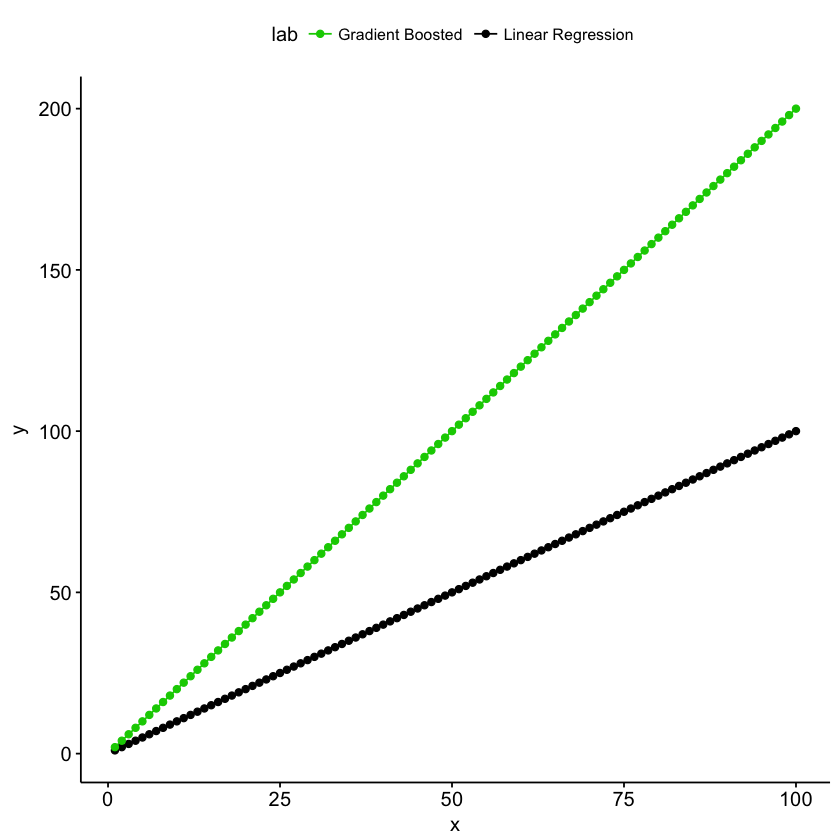

In [34]:
# Now remove the Random Forest and see if it still works:

toy.df %>% filter(lab != "Random Forest") %>% ggline(x = "x", y = "y", color = "lab") + colScale